In [ ]:
!pip install opencv-python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [ ]:

data_dir = zip_file = tf.keras.utils.get_file("flower_photos",origin=_URL,
                                   cache_dir = ".",
                                   untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [ ]:
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
roses = list(data_dir.glob('*roses/*.jpg'))

len(roses)

641

In [ ]:
roses[:5]

[PosixPath('datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 PosixPath('datasets/flower_photos/roses/3265902330_d8b1e44545.jpg'),
 PosixPath('datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg')]

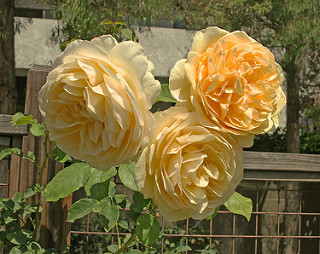

In [ ]:
PIL.Image.open(roses[5])

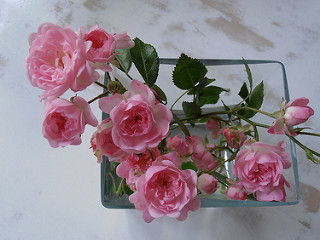

In [ ]:
sf = list(data_dir.glob('*sunflowers/*.jpg'))
PIL.Image.open(roses[0])

In [ ]:
flowers_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
len(flowers_dict['roses'])

641

In [ ]:
flowers_dict['tulips'][:5]

[PosixPath('datasets/flower_photos/tulips/14017640283_c417141832_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2481827798_6087d71134.jpg'),
 PosixPath('datasets/flower_photos/tulips/8622237974_b362574785_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13514131694_d91da4f4fc.jpg'),
 PosixPath('datasets/flower_photos/tulips/4520577328_a94c11e806_n.jpg')]

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
img = cv2.imread(str(flowers_dict['roses'][0]))

In [ ]:
img

array([[[222, 206, 193],
        [220, 204, 191],
        [220, 204, 192],
        ...,
        [178, 161, 152],
        [179, 161, 150],
        [179, 161, 150]],

       [[222, 206, 193],
        [221, 205, 193],
        [220, 204, 192],
        ...,
        [179, 162, 153],
        [179, 163, 151],
        [179, 163, 151]],

       [[221, 205, 193],
        [221, 204, 195],
        [220, 203, 194],
        ...,
        [177, 162, 153],
        [177, 162, 153],
        [177, 163, 151]],

       ...,

       [[207, 192, 183],
        [208, 193, 184],
        [205, 193, 183],
        ...,
        [139, 127, 123],
        [139, 127, 121],
        [139, 127, 121]],

       [[208, 193, 184],
        [207, 192, 183],
        [205, 193, 183],
        ...,
        [138, 126, 122],
        [139, 127, 121],
        [140, 128, 122]],

       [[208, 193, 184],
        [207, 192, 183],
        [205, 193, 183],
        ...,
        [140, 128, 124],
        [142, 130, 124],
        [144, 132, 126]]

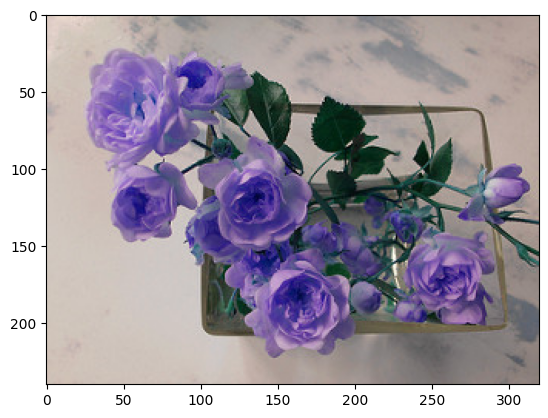

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
img = cv2.imread(str(flowers_dict['roses'][1]))
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X = []
Y = []

for flower_name, images in flowers_dict.items():
    for images in images:
        img = cv2.imread(str(images))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        Y.append(flowers_labels_dict[flower_name])

In [ ]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0)

In [ ]:
len(X_train)

2752

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled, y_train, epochs=6)

Epoch 1/6
86/86 [==============================] - 80s 909ms/step - loss: 1.3469 - accuracy: 0.4233
Epoch 2/6
86/86 [==============================] - 78s 896ms/step - loss: 1.0260 - accuracy: 0.5916
Epoch 3/6
86/86 [==============================] - 77s 893ms/step - loss: 0.8248 - accuracy: 0.6911
Epoch 4/6
86/86 [==============================] - 77s 899ms/step - loss: 0.6428 - accuracy: 0.7536
Epoch 5/6
86/86 [==============================] - 78s 904ms/step - loss: 0.4184 - accuracy: 0.8547
Epoch 6/6
86/86 [==============================] - 78s 902ms/step - loss: 0.2410 - accuracy: 0.9241


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 275ms/step - loss: 1.2108 - accuracy: 0.6329


[1.210817575454712, 0.6328976154327393]

In [ ]:
pred = model.predict(X_test_scaled)

29/29 [==============================] - 7s 243ms/step


In [ ]:
pred[0]

array([ 3.7366605,  4.296466 ,  7.1754713, -8.606627 ,  5.381783 ],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(pred[0])

In [ ]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.5587311e-02, 4.4786286e-02, 7.9704201e-01, 1.1153285e-07,
       1.3258436e-01], dtype=float32)>

In [ ]:
np.argmax(score)

2

In [ ]:
y_test[0]

1

In [ ]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.6),
])

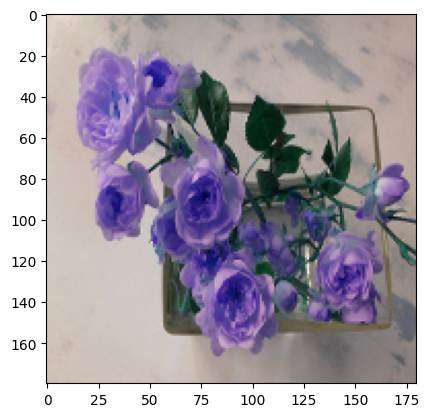

In [ ]:
plt.imshow(X[0])

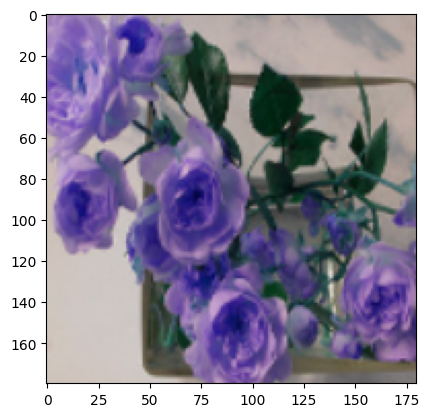

In [ ]:
plt.imshow(data_aug(X)[0].numpy().astype('int64'))

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
a = np.array(data_augmentation)

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
86/86 [==============================] - 94s 1s/step - loss: 1.4948 - accuracy: 0.3659
Epoch 2/15
86/86 [==============================] - 92s 1s/step - loss: 1.1382 - accuracy: 0.5273
Epoch 3/15
86/86 [==============================] - 92s 1s/step - loss: 0.9976 - accuracy: 0.6123
Epoch 4/15
86/86 [==============================] - 93s 1s/step - loss: 0.9435 - accuracy: 0.6294
Epoch 5/15
86/86 [==============================] - 91s 1s/step - loss: 0.8819 - accuracy: 0.6606
Epoch 6/15
86/86 [==============================] - 92s 1s/step - loss: 0.8328 - accuracy: 0.6777
Epoch 7/15
86/86 [==============================] - 91s 1s/step - loss: 0.8044 - accuracy: 0.6871
Epoch 8/15
86/86 [==============================] - 91s 1s/step - loss: 0.7677 - accuracy: 0.7093
Epoch 9/15
86/86 [==============================] - 90s 1s/step - loss: 0.7331 - accuracy: 0.7206
Epoch 10/15
86/86 [==============================] - 90s 1s/step - loss: 0.6824 - accuracy: 0.7376
Epoch 11/15
86/86 [

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 239ms/step - loss: 0.7685 - accuracy: 0.7102


[0.7685055732727051, 0.7102396488189697]